## Predict chemcical distance matrix with chemical graphs -> GINFP and the coordinates of protein binding site atoms

In [1]:
%load_ext autoreload
%autoreload 2

In [40]:
import sys

sys.path.append("..")
import os
import tarfile

import pandas as pd
from torch_geometric.data import Data, InMemoryDataset, Batch
from chem_reader.chemreader.readers import PDB
from tqdm.notebook import tqdm
from rdkit.Chem.Draw.MolDrawing import MolDrawing, DrawingOptions
from rdkit.Chem.Draw import IPythonConsole

from slgnn.data_processing.pdbds_ligands_dataset import (
    PDBLigands,
    ThreeDimensionOneHot,
    PDBBsAndSub,
    PDBSubstrates,
    PDBProteins
)

### Table lists the ligand pdb file and its corresponding proteining binding site pdb file

In [3]:
coresponding_table = pd.read_csv(os.path.join("..", "data", "PDB_sub", "nometal-pdbtoligand.txt"), sep="\t")

In [4]:
coresponding_table.head()

,pdbid_chainid,ligand_pdb_file,binding_site_coodinate_file
0,2lvzA.pdb,2lvz_LVZ_A_1.pdb,2lvzA_BS01_LVZ.pdb
1,2lvzA.pdb,2lvz_SGN_A_1.pdb,2lvzA_BS02_SGN.pdb
2,2lwiA.pdb,2lwi_GNP_A_1.pdb,2lwiA_BS01_GNP.pdb
3,2lwiA.pdb,2lwi_KOB_A_1.pdb,2lwiA_BS02_KOB.pdb
4,2m0zA.pdb,2m0z_33B_A_1.pdb,2m0zA_BS01_33B.pdb


In [9]:
# Paths to the ligands and protein binding sites
ligands_root = os.path.join("..", "data", "PDB_sub", "chemicals", "ligand")
proteins_root = os.path.join("..", "data", "PDB_sub", "protein_binding_pockets", "bs-pdbs")
subs_file = os.path.join("..", "data", "PDB_sub", "chemicals", "ligand_ordered.tar.gz")

In [3]:
ligands = PDBSubstrates(root=os.path.join("..", "data", "PDB_sub"), verbose=True)

0it [00:00, ?it/s]

Processing...


54253it [12:16, 76.28it/s] 

Fail to get the coordinates of the atoms.


78629it [17:36, 74.41it/s] 


Done!


In [4]:
ligands[0]

Data(edge_index=[2, 66], x=[31, 6], y=[70, 70])

In [5]:
proteins = PDBProteins(root=os.path.join("..", "data", "PDB_sub"))

In [6]:
proteins

PDBProteins(78629)

In [47]:
proteins[0].x

tensor([[129.1660, 196.8200, 181.3280,   1.0000,   1.0000,   0.0000,   4.0000,
           0.0000,   0.0000],
        [129.4020, 198.2220, 181.0150,   0.0000,   3.0000,   0.0000,   4.0000,
           0.0000,   2.0000],
        [130.0770, 198.3500, 179.6520,   0.0000,   2.0000,   0.0000,   3.0000,
           0.0000,   0.0000],
        [129.8650, 199.3270, 178.9320,   2.0000,   1.0000,   0.0000,   3.0000,
           0.0000,   0.0000],
        [130.2610, 198.8800, 182.0950,   0.0000,   2.0000,   0.0000,   4.0000,
           0.0000,   0.0000],
        [130.5660, 200.3200, 181.8270,   0.0000,   3.0000,   0.0000,   3.0000,
           1.0000,   0.0000],
        [131.4900, 200.7200, 180.8860,   1.0000,   2.0000,   0.0000,   3.0000,
           1.0000,   0.0000],
        [130.0730, 201.4540, 182.3770,   0.0000,   2.0000,   0.0000,   3.0000,
           1.0000,   0.0000],
        [131.5500, 202.0390, 180.8650,   0.0000,   2.0000,   0.0000,   3.0000,
           1.0000,   0.0000],
        [130.7000, 

In [17]:
pros = os.scandir(proteins_root)

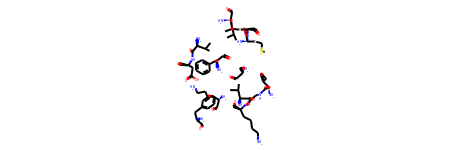

In [28]:
pdb = PDB(next(pros).path)
pdb.rdkit_mol

In [38]:
DrawingOptions.coordScale=1.0

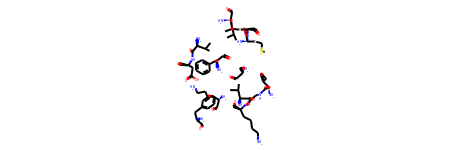

In [37]:
pdb.rdkit_mol

In [42]:
batch = Batch.from_data_list([proteins[0], proteins[1]])

In [44]:
batch.to_data_list()

[Data(edge_index=[2, 90], x=[48, 9]), Data(edge_index=[2, 260], x=[137, 9])]

In [45]:
proteins[0]

Data(edge_index=[2, 90], x=[48, 9])

In [46]:
proteins[1]

Data(edge_index=[2, 260], x=[137, 9])